> From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

# Importing Libraries

In [1]:
# importng libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import Circle

# Loading the Data

In [2]:
# loading data 
raw_url = 'https://raw.githubusercontent.com/ukantjadia/TSF-GRIP-Tasks/Main/Task-02/Iris.csv'
df = pd.read_csv(raw_url)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Model
The given task is to find the best value for k.
So, we are using the **Elbow Curve Method** for finding the best value. read my [blog]() better understanding.
NOTE: For blog link refre to my GitHub[https://github.com/ukantjadia/](https://github.com/ukantjadia) or LinkedIn[www.linkedin.com/in/ukantjadia](https://linkedin.com/in/ukantjadia)


In [3]:
x = df.iloc[:,[0,1,2,3]].values

wcss = []

for i in range(1,11): # we are taking 1,10 values as initial centroids.
  kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_) # appending the within cluster sum of squares 

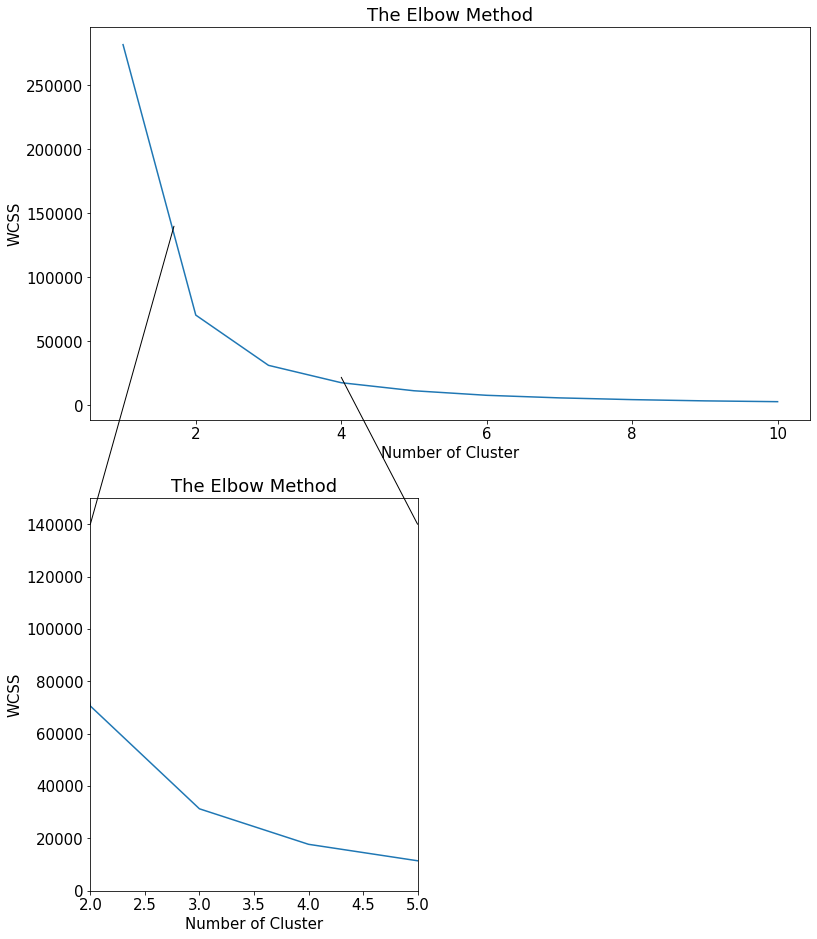

In [4]:
fig = plt.figure(figsize=(10,12))
plt.rc('font', size=15) 
plt.subplots_adjust(bottom = 0, left = 0, top = 1, right = 1)
sub1 = fig.add_subplot(2,2,(1,2)) # two rows, two columns, first cell
sub1.plot(range(1,11),wcss)
sub1.set_title('The Elbow Method')
sub1.set_xlabel('Number of Cluster')
sub1.set_ylabel('WCSS')

sub2 = fig.add_subplot(2,2,3) # two rows, two colums, combined third and forth cell
sub2.set_xlim(2,5)
sub2.set_ylim(0,150000)
sub2.plot(range(1,11),wcss)
sub2.set_title('The Elbow Method')
sub2.set_xlabel('Number of Cluster')
sub2.set_ylabel('WCSS')
con1 = ConnectionPatch(xyA=(1.7,140000),xyB=(2,140000),axesA=sub1,axesB=sub2,coordsA="data",coordsB="data")
con2 = ConnectionPatch(xyA=(4,22000),xyB=(5,140000),axesA=sub1,axesB=sub2,coordsA="data",coordsB="data")

sub2.add_artist(con1)
sub2.add_artist(con2)

plt.show()

In [5]:
# Modeling 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

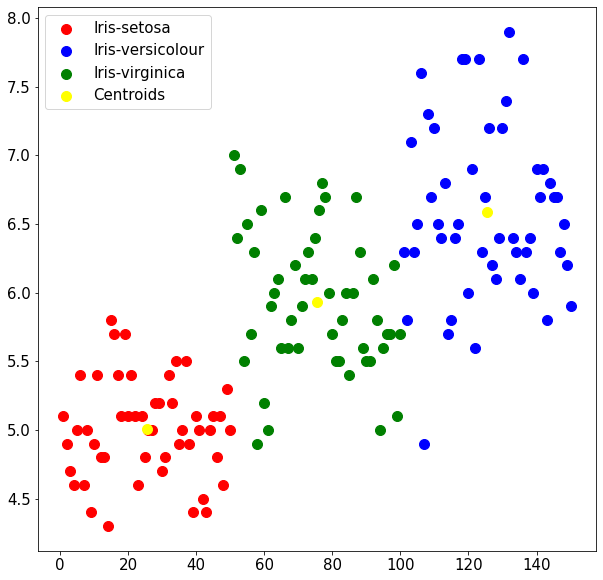

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

So, we have 3 centroids finally.